In [1]:
import os
os.chdir(r'C:\Users\Navid\Documents\ds_salary_proj')

In [2]:
#!conda install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('df_salary')

In [4]:
df = df.reset_index(drop=True)

## Cleaning the salary data

In [5]:
# df['salary_type'] = df['Salary Range'].apply(lambda x: x.split()[1] if 'Employer Provided Salary' not in x
#                                              else x.split()[1] + " "+ x.split()[2] if 'Per Hour' in x
#                                              else x.split('\n')[0])

In [6]:
import re
df['salary'] = df['Salary Range'].str.extract('(\$\d{2,3}k?-\$\d{2,3}k?)') 
df['per_hour'] = df['Salary Range'].apply(lambda x: 1 if 'Per' in x or 'per' in x else 0)

In [34]:
df.salary.dropna(axis = 0, inplace = True)

In [7]:
# # df['Salary Range'] = df['Salary Range'].apply(lambda x: x.split("\n")[0] if 'Employer Provided Salary' not in x 
#                                               else x.split('\n')[1])

In [8]:
# df['Salary Range'] = df['Salary Range'].apply(lambda x: x.split()[0] if 'per hour' in x.lower() 
#                                               else x)

In [9]:
# print(df['salary_type'].unique())

In [10]:
# df['per_hour'] = [1 if 'Per' in x else 0 for x in df['salary_type']]
# df['Employer_reported'] = df['salary_type'].apply(lambda x: 1 if 'employer' in x.lower() else 0)

In [35]:
#extracting avg salary from slaray estimation
df['avg_salary'] = (df['salary'].map(lambda x: x.split('-')[0].lstrip('$').rstrip('k')).astype('int32')
                    +df['salary'].map(lambda x: x.split('-')[1].lstrip('$').rstrip('k')).astype('int32'))/2

In [36]:
#now lets find the avg salary of those reported per hour
#we multiply them by 2000 (approximately the number of hourse per year) and devide by 1000 (therefore, we just multiply it by 2)
df['avg_salary'] = df.apply(lambda x: x.avg_salary if x.per_hour != 1 else x.avg_salary*2,axis=1)

In [37]:
df.drop(['Salary Range', 'salary', 'Unnamed: 0'], axis=1, inplace =True)

In [38]:
df = df[df.duplicated().values != True]

In [39]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,per_hour,avg_salary
0,Data Analyst,Job Snapshot\nLocation:\n\n7500 East Columbia ...,3.7,Shoe Carnival Inc.\n3.7,"Evansville, IN",-1,5001 to 10000 Employees,1978,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$1 to $2 billion (USD),-1,0,51.5
1,Data Analyst,Data Analyst\n\nClassification:\n\nExempt\n\nR...,4.6,Fusion Medical Staffing\n4.6,"Omaha, NE",-1,201 to 500 Employees,2009,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,0,52.0
2,Business Data Analyst (Mortgage Operations),"First Midwest, with assets over $20 billion, i...",3.5,First Midwest Bank\n3.5,"Gurnee, IL",-1,1001 to 5000 Employees,1940,Company - Public,Banks & Credit Unions,Finance,$500 million to $1 billion (USD),-1,0,61.5
3,Web Data Analyst,Web Data Analyst\nCorporate Headquarters\n1257...,3.5,Uline\n3.5,"Milwaukee, WI",-1,5001 to 10000 Employees,1980,Company - Private,Wholesale,Business Services,Unknown / Non-Applicable,-1,0,72.0
4,Clinical Data Analyst (RN) - MCS Research & De...,Data Analyst - MCS Research & Development - IN...,2.8,Integris Health\n2.8,"Midwest City, OK",-1,5001 to 10000 Employees,1983,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Less than $1 million (USD),-1,0,47.5


## Lets extract the name of the companies

In [40]:
df.loc[df['Rating'] == -1, 'Company Name']
# it seems that the companies without rating, only have their name in the Company Name column

1636    CEC Vibration Products, LLC
2503           Edward Daniels Group
Name: Company Name, dtype: object

In [41]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] == -1 else x['Company Name'].split("\n")[0] , axis = 1)

In [42]:
#Adding a fature for FAANG companies
df['FAANG'] = df['Company Name'].apply(lambda x: 1 if x in ['Facebook','Amazon','Netflix','Apple','Google'] else 0)

## Extracting the states from the locations

In [43]:
# # Since in Location columns there are instacnes wuth differnt structre, such as 'Virgina', we need to replace them with 
# # the same structure as others so that we can extract usefull info from them

# # We remove the ones without specified location (United States)
df = df[df['Location'] != 'United States']
# list_1 = []
# for item in df.Location:
#     if ',' not in item:
#         list_1.append(item)

# set(list_1)

In [44]:
df['state'] = df.apply(lambda x: x['Location'] if ',' not in x['Location']
                       else x['Location'].split(',')[1].lstrip() , axis = 1)
# we create a dict to use for mapping
state_convertor = {'Colorado' : 'CO' , 'Georgia' : 'GA' , 'Missouri' : 'MO' , 'New Jersey' : 'NJ' ,
             'Remote' : 'Remote' , 'Utah' : 'UT' , 'Virginia' : 'VA' , 'California' : 'CA' , 'Pennsylvania' : 'PA' ,
                'Puerto Rico' : 'PR' , 'Texas' : 'TX' , 'Illinois' : 'IL' }
df['state'] = df['state'].apply(lambda x: state_convertor[x] if x in state_convertor else x)

In [45]:
# Now we want to change the founded year to age of the company
df['Founded'] = df['Founded'].apply(lambda x: -1 if x == -1 else 2020 - x)

In [46]:
#the length of the job description can be a usefull feature
df.dropna(axis=0, inplace=True)
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

## Job Titles Simplifier
## Extracting Seniority

In [47]:
df['Job Title'].value_counts()[:40]

Data Analyst                                                399
Data Scientist                                              265
Data Engineer                                                51
Senior Data Scientist                                        26
Senior Data Engineer                                         21
Machine Learning Engineer                                    20
Senior Data Analyst                                          16
Software Engineer                                            11
Senior Software Engineer                                     10
Research Data Analyst                                         8
Sr. Data Scientist                                            7
Senior Business Intelligence Analyst                          6
Data Governance Analyst                                       6
Business Data Analyst                                         5
Senior Machine Learning Engineer                              5
Lead Data Scientist                     

In [59]:
# job title convertor
def title_extractor(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower() or 'marketing data analyst' in title.lower() or 'business intelligence analyst' in title.lower() or 'quantitative analyst' in title.lower() or 'analytic' in title.lower() or 'analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower() or 'deep learning' in title.lower():
        return 'machine learning engineer'
#     elif 'software engineer' in title.lower():
#         return 'software engineer'
#     elif 'data architect' in title.lower():
#         return 'data architect'
#     elif 'research scientist' in title.lower():
#         return 'research scientist'
#     elif 'lab scientist' in title.lower() or 'labratory scientist' in title.lower():
#         return 'lab scientist'
    else:
        return 'na'
    
    

In [60]:
# seniority extractor
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower() or 'ii' in title.lower():
        return '1'
#     elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
#         return 'junior'
    else:
        return '0'
    

In [61]:
df['seniority'] = df['Job Title'].apply(seniority)
df['title'] = df['Job Title'].apply(title_extractor)

In [62]:
df.seniority.value_counts()

0    1784
1     620
Name: seniority, dtype: int64

In [63]:
df.title.value_counts()

data analyst                 925
na                           674
data scientist               559
data engineer                141
machine learning engineer    105
Name: title, dtype: int64

In [64]:
df.loc[df['title']=='na','Job Title']

515     Biomedical Engineer / Project Scientist (Occup...
530     Medical Laboratory Scientist or Medical Lab Te...
531     Biomedical Engineer / Project Scientist (Perfo...
535                                       Nurse Scientist
537     Biomedical Engineer / Project Scientist (Physi...
                              ...                        
2696                             Senior Software Engineer
2697                               DataOps Field Engineer
2700                          Electronics Design Engineer
2703                             MTS 2, Software Engineer
2704        Semiconductor Equipment Engineer - Yield Star
Name: Job Title, Length: 674, dtype: object

In [65]:
# Lets remove irrelevant jobs
df = df[df.title != 'na']

## Defining some new features from the job descriptions

In [66]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['r studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['ML'] = df['Job Description'].apply(lambda x: 1 if 'machine' in x.lower() or 'ml' in x.lower() else 0)
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['deep_learning'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'pytorch' in x.lower() or 'rnn' in x.lower() or 'knn' in x.lower() or 'computer vision' in x.lower() else 0)
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() or 'gcp' in x.lower() or 'cloud' in x.lower() or 'azure' in x.lower() else 0)


In [67]:
df.ML.value_counts()

0    932
1    798
Name: ML, dtype: int64

## Some work on the industry column

In [68]:
# some work on indsutry columns
manufacturing_list = []
for item in df.Industry:
    if 'manufacturing' in item.lower():
        manufacturing_list.append(item)
df['Industry'] = df['Industry'].apply(lambda x: 'manufacturing' if x in manufacturing_list else x)   
financial_list = ['Brokerage Services', 'Insurance Agencies & Brokerages', 'Financial Transaction Processing' , 
                 'Investment Banking & Asset Management', 'Lending', 'Banks & Credit Unions', 'Financial Analytics & Research']
df['Industry'] = df['Industry'].apply(lambda x: 'financial_related' if x in financial_list else x)
other_industries = df.Industry.value_counts().index[df.Industry.value_counts().values>10]
df['Industry'] = df['Industry'].apply(lambda x: 'other_industries' if x not in other_industries else x)

## Education

In [69]:
# education form job description
df['graduate'] = df['Job Description'].apply(lambda x: 1 if ('phd' in x.lower()) or ('doctor' in x.lower()) or ('master' in x.lower()) else 0)
df['undergrad'] = df['Job Description'].apply(lambda x: 1 if 'bachelor' in x.lower() or 'undergrad' in x.lower() or 'post secondary' in x.lower() else 0)
# df['master'] = df['Job Description'].apply(lambda x: 1 if 'master' in x.lower() else 0)

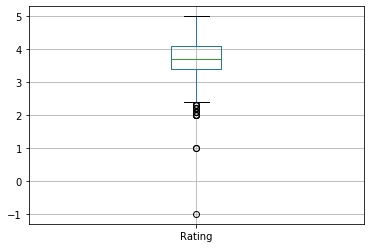

In [70]:
df.boxplot(column = 'Rating')

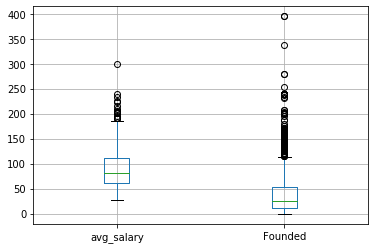

In [71]:
df.boxplot(column = ['avg_salary','Founded'])
# Many outliers for Founded

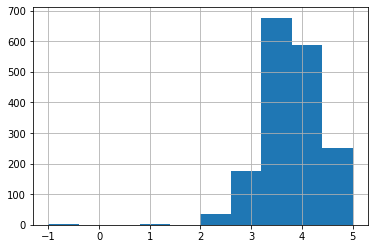

In [72]:
df.Rating.hist()
#pretty much normalized

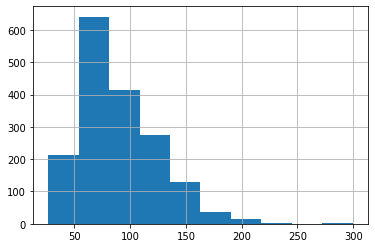

In [73]:
df.avg_salary.hist()
# it seems that the avg_salary data is skewed

In [74]:
df.corr()['avg_salary']

Rating           0.137537
Headquarters          NaN
Founded         -0.062666
Competitors           NaN
per_hour        -0.044569
avg_salary       1.000000
FAANG            0.124863
desc_length      0.128511
python           0.354383
r studio        -0.049378
ML               0.426250
spark            0.241348
deep_learning    0.300244
aws              0.218647
graduate         0.161683
undergrad       -0.246811
Name: avg_salary, dtype: float64

In [42]:
df_cat = df[['Company Name','Location','Type of ownership', 'Industry', 'Sector','state','seniority',
               'title', 'python', 'r studio', 'ML', 'spark', 'deep_learning','Size']]

graph is Company Name , and the total number is 15


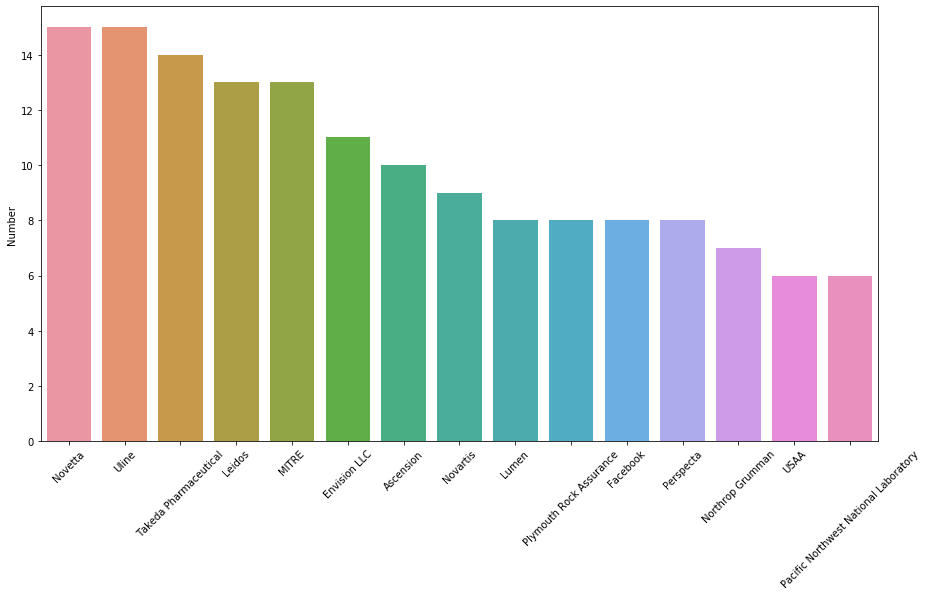

graph is Location , and the total number is 15


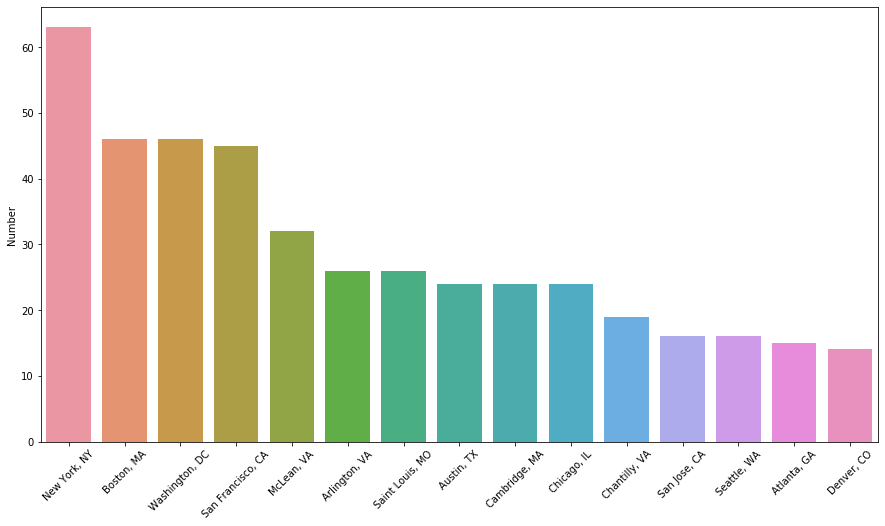

graph is Type of ownership , and the total number is 12


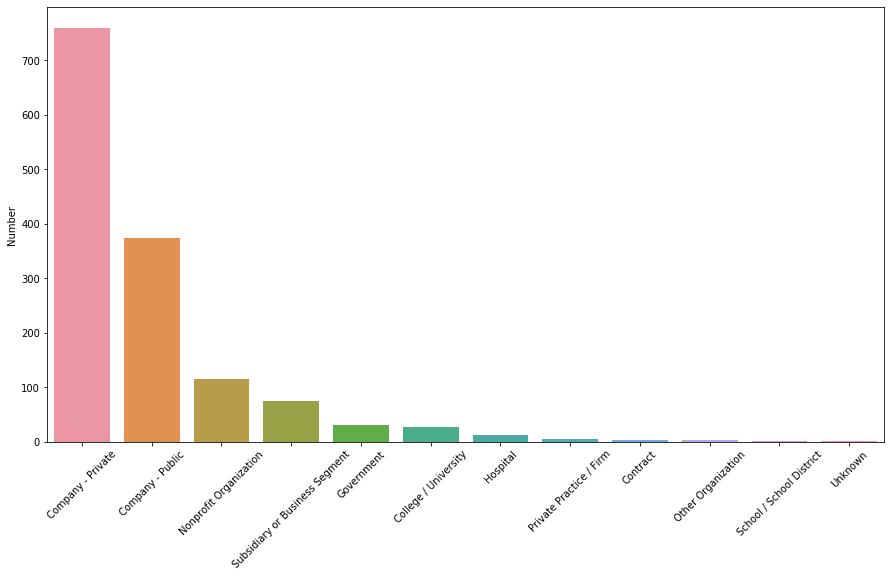

graph is Industry , and the total number is 15


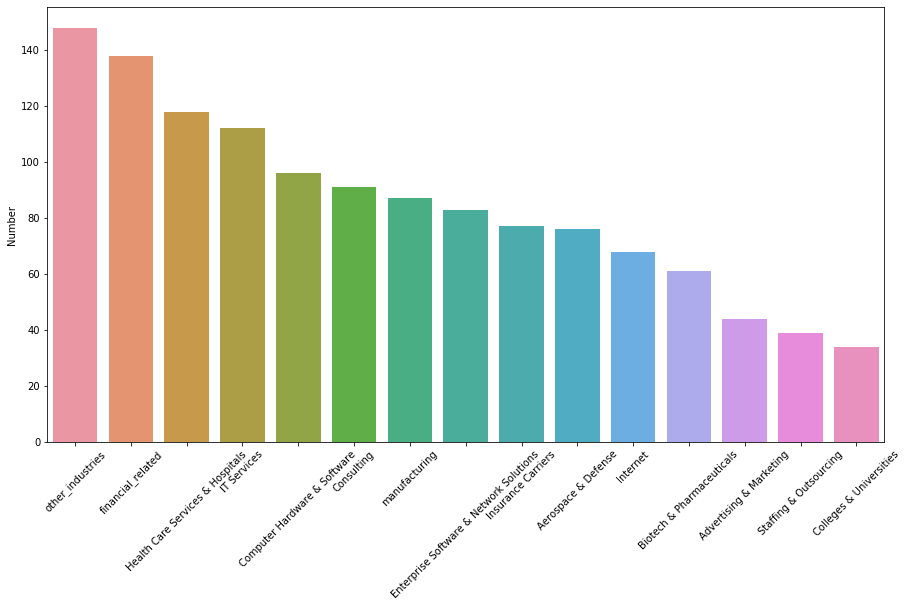

graph is Sector , and the total number is 15


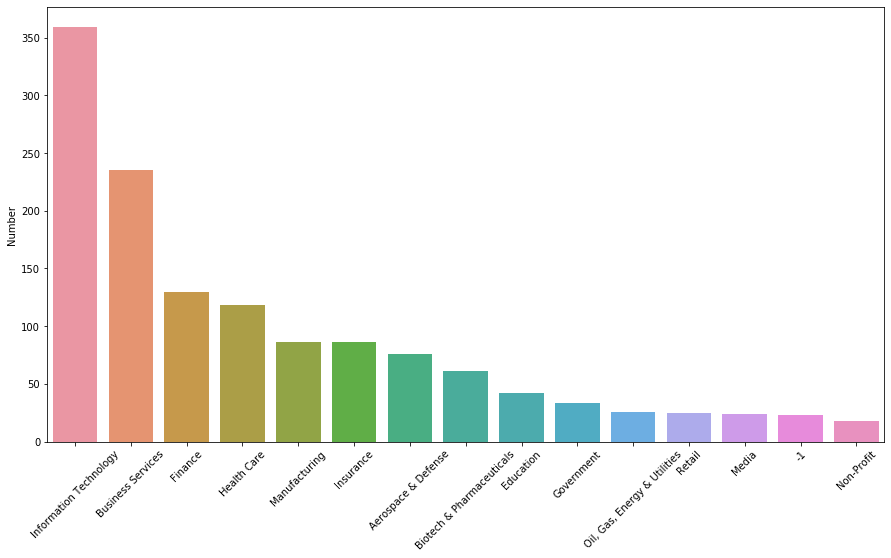

graph is state , and the total number is 15


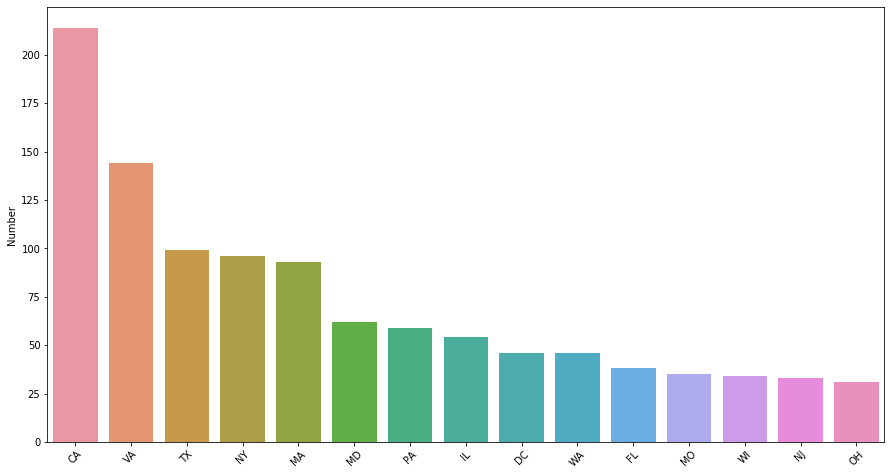

graph is seniority , and the total number is 2


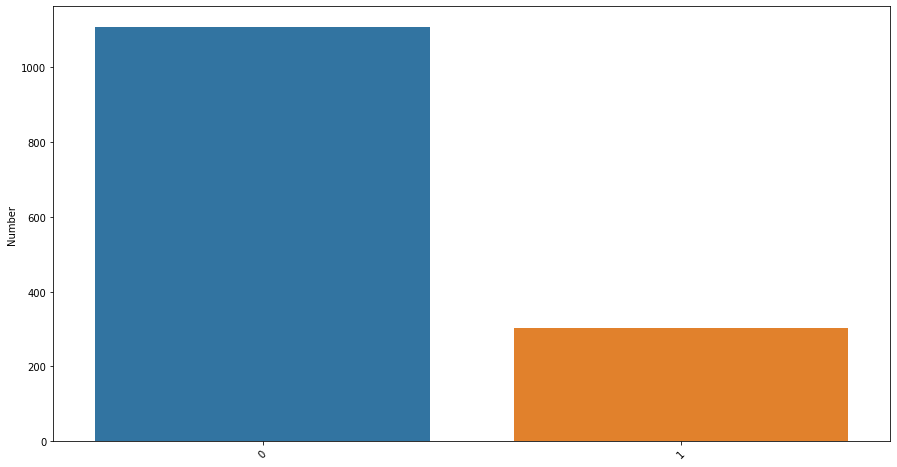

graph is title , and the total number is 5


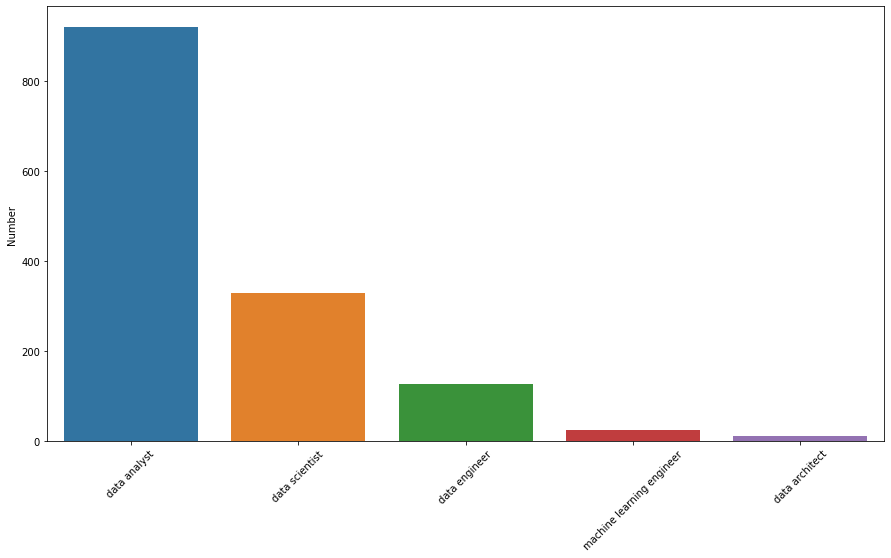

graph is python , and the total number is 2


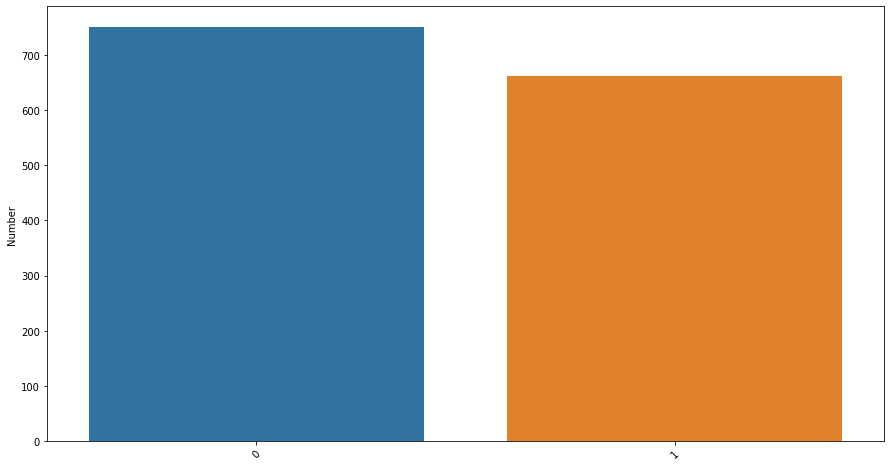

graph is r studio , and the total number is 2


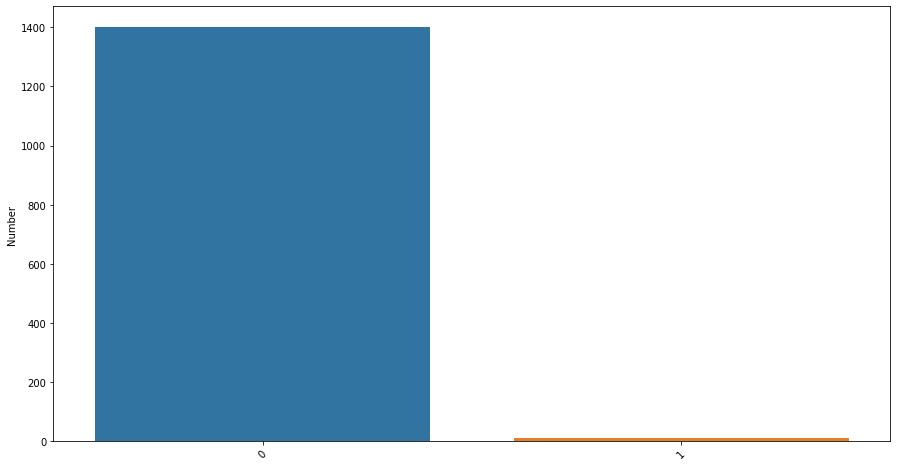

graph is ML , and the total number is 2


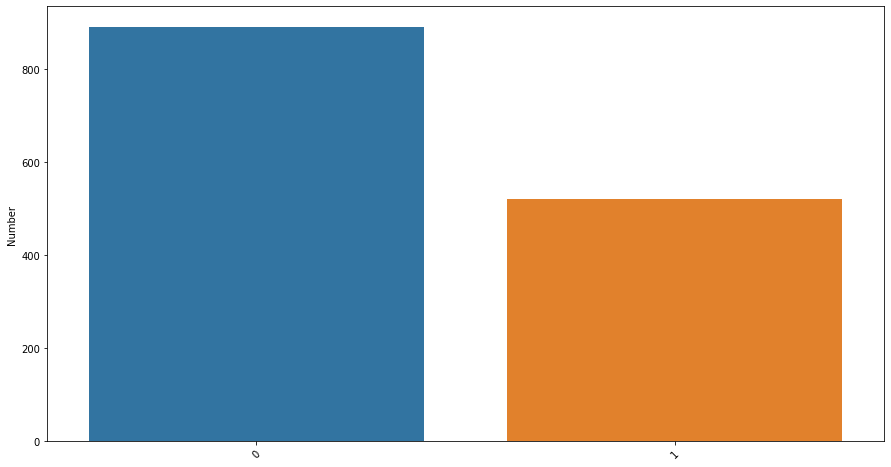

graph is spark , and the total number is 2


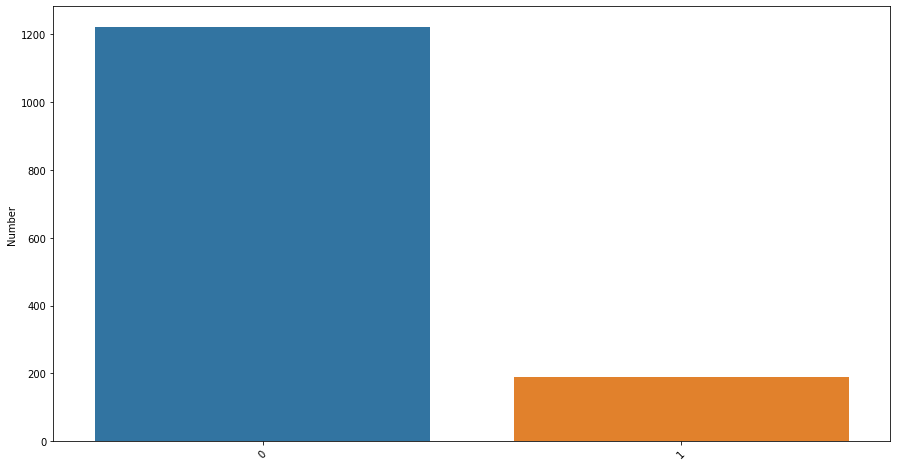

graph is deep_learning , and the total number is 2


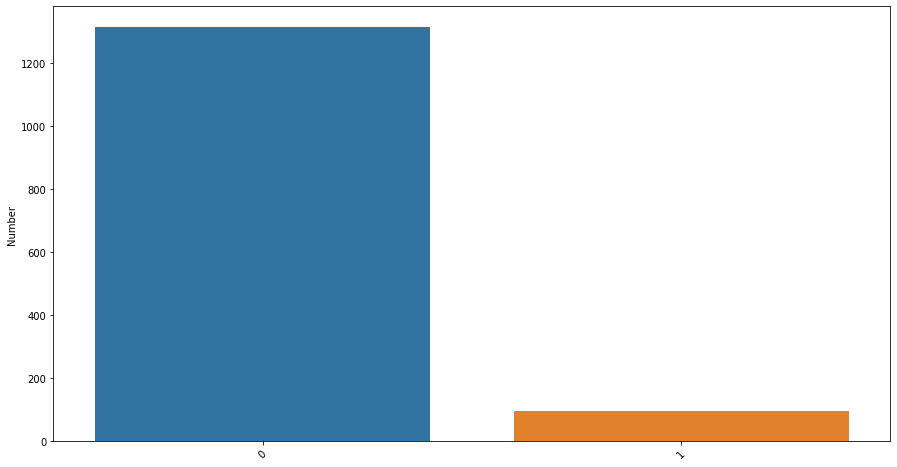

graph is Size , and the total number is 8


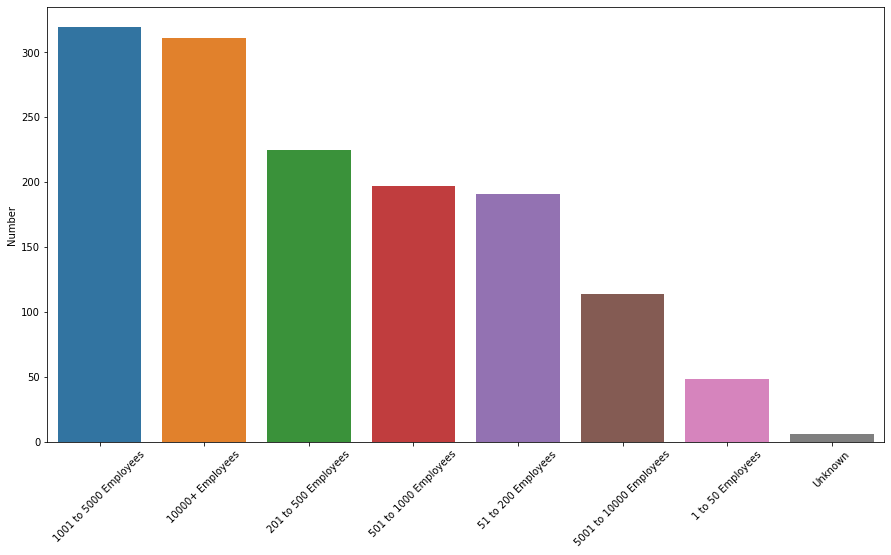

In [43]:
#lets draw some bar graphs for the categorical features
for i in df_cat.columns:
    plt.figure(figsize = (15,8))
    cat_num = df_cat[i].value_counts()[:15]
    print("graph is %s , and the total number is %d" %(i,len(cat_num)))
    ax = sns.barplot(x = cat_num.index , y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
    ax.set(ylabel = 'Number')
    plt.show()
    

In [75]:
pd.pivot_table(df, index = ['title','seniority'] , values ='avg_salary')
# it is wierd. Seniors are getting paid lower than juniors. Lets take this column out.

avg_salary
title                     seniority            
data analyst              0           63.370988
                          1           88.914384
data engineer             0           98.530928
                          1          116.284091
data scientist            0          107.642529
                          1          133.157258
machine learning engineer 0          125.345238
                          1          169.666667

In [76]:
pd.pivot_table(df, index = 'Industry' , values ='avg_salary')

,avg_salary
Industry,
-1,73.896552
Accounting,74.423077
Advertising & Marketing,82.938776
Aerospace & Defense,92.216667
Architectural & Engineering Services,67.433333
Biotech & Pharmaceuticals,113.288462
Colleges & Universities,62.538462
Computer Hardware & Software,103.588652
Consulting,84.163551


In [77]:
pd.pivot_table(df, index = 'state' , values ='avg_salary').sort_values('avg_salary',ascending =False)

,avg_salary
state,
Arapahoe,124.500000
CA,114.046326
MA,101.565217
VA,95.802198
MN,92.456522
WA,92.120690
CO,91.367647
NY,88.659483
MD,87.630137


In [78]:
df = df.loc[df.state != 'Los Angeles']

In [42]:
# doing some text analysis on the job description
from wordcloud import WordCloud , STOPWORDS
from nltk.corpus import stopwords;
from nltk.tokenize import word_tokenize
#nltk.download('all')

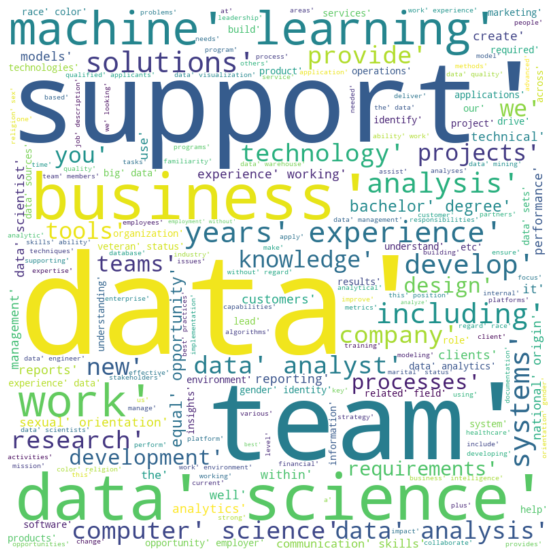

In [44]:
words = " ".join(df['Job Description'])
def pucntuation_remover(input_text):
    filtered = []
    word_token = word_tokenize(input_text)
    stop_words = set(stopwords.words('english'))
    for i in word_token:
        if i not in stop_words and i.isalpha():
            filtered.append(i.lower())
    return filtered
text = pucntuation_remover(words)
wc = WordCloud(width = 800 , height = 800 , background_color = 'white' , stopwords = STOPWORDS)
wc.generate(str(text))
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

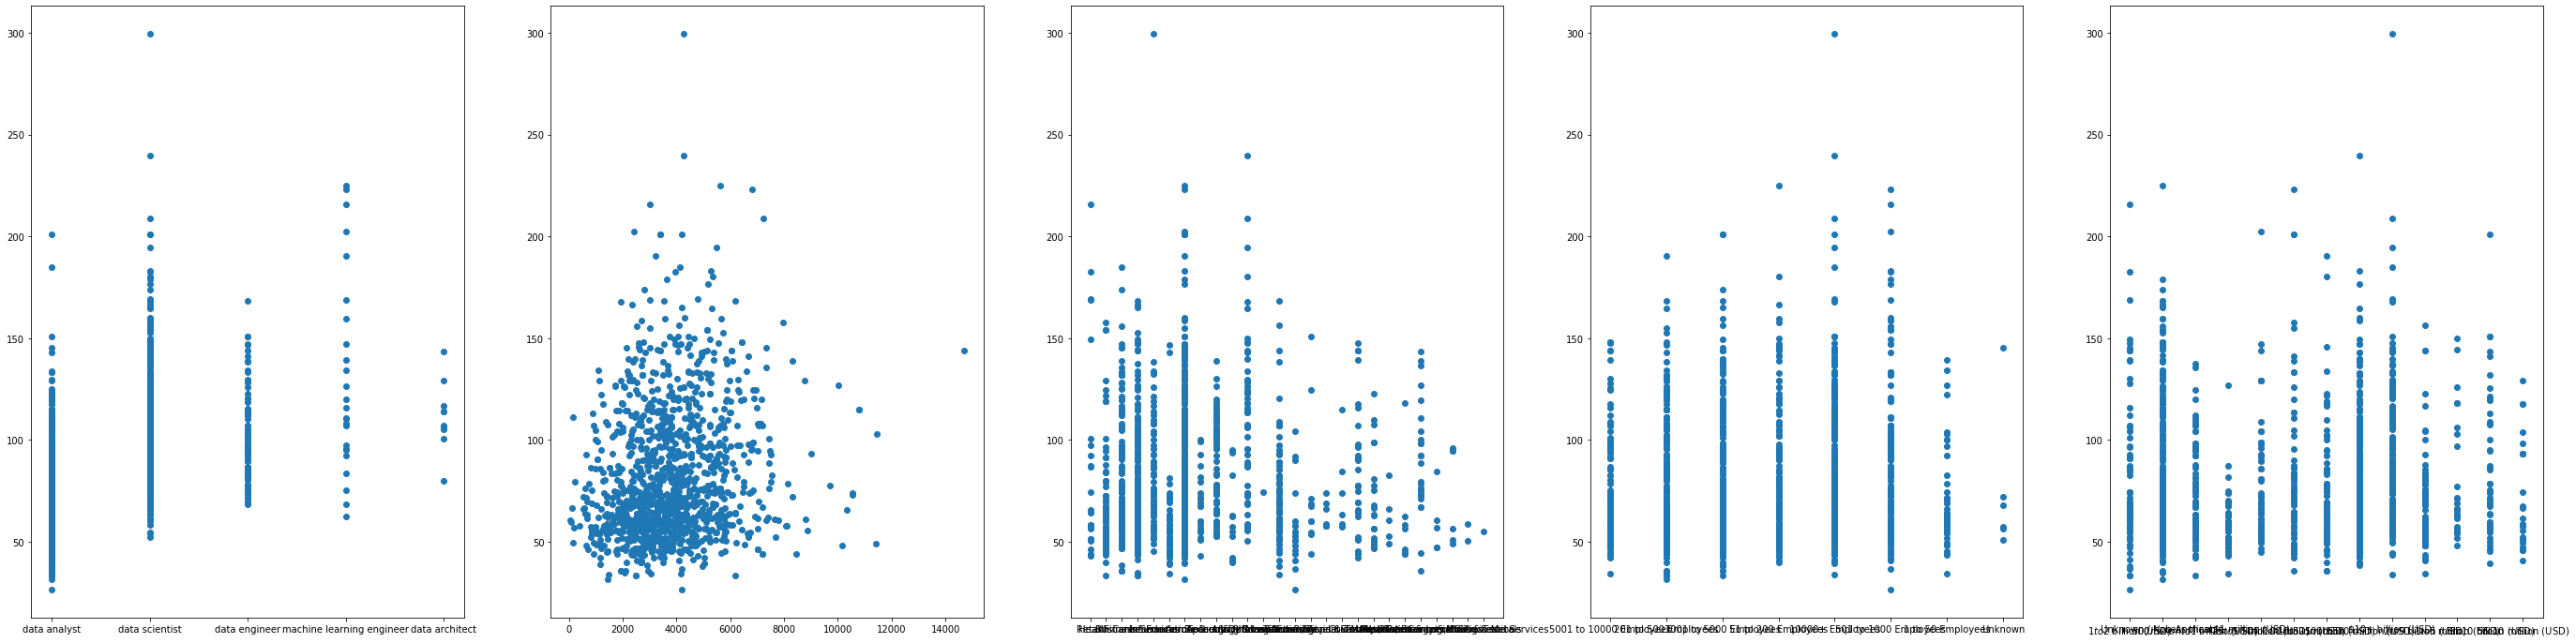

In [185]:
fig , (ax1, ax2, ax3 , ax4 , ax5) = plt.subplots(1,5 , figsize = (48,12))
ax1.scatter(df['title'],df['avg_salary'])
ax2.scatter(df['desc_length'],df['avg_salary'])
ax3.scatter(df['Sector'],df['avg_salary'])
ax4.scatter(df['Size'],df['avg_salary'])
ax5.scatter(df['Revenue'],df['avg_salary'])

# Lets see how many years of experience each job needs

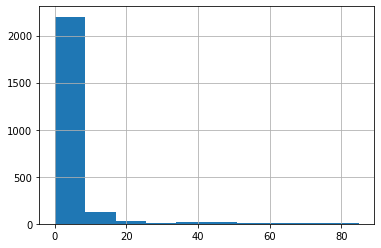

In [79]:
df_exp = df['Job Description'].str.extractall(r'\(?(\d?\d)\+?\)? (?:Y|y)ear')
df_exp.rename(columns = {0:'exp_year'},inplace=True)
df_exp['exp_year'].fillna(0,inplace=True)
df_exp.reset_index('match',inplace=True)
df_exp['exp_year'] = df_exp['exp_year'].astype('int32')
df_exp.drop('match',axis=1,inplace=True)
df_exp['exp_year'].hist()

In [80]:
# There are some wierd numbers in years of exp. Lets check anything greater than 10
print(df_exp[df_exp['exp_year']>10])

      exp_year
14          30
16          11
17          75
28          55
31          25
...        ...
2644        12
2644        12
2644        12
2688        11
2702        20

[149 rows x 1 columns]


In [81]:
#Lets remove any years of expereicne more than 14 
df_exp = df_exp[df_exp['exp_year']<15]

In [82]:
df_exp2 =  df_exp.groupby(df_exp.index)['exp_year'].mean()

In [83]:
df2 = pd.merge(df,df_exp2, left_index = True, right_index =True, how = 'left') 

In [84]:
df2['exp_year'].fillna(0,inplace=True)

## Lets Export the final data frame

In [85]:
# df = df.loc[df.avg_salary > 40]
df2.to_csv('eda_data_modified')